## Compte Rendu Mini Projet 

La première étape consiste à extraire les données qui nous intéressent du fichier 'DataMars.csv'. 
On ectrait les colonnes "Date" et "Longitude" car ce sont celles qui nous interessent et on les organise dans un dictionnaire à partiduquel on crée un nouveau DataFrame.
On observe que dans l'échantillon temporel fourni par le csv, il faut selectionner judicieusement une date de début et de fin afin de mettre en évidence le phénomène de rétrograde.
Grâce à un accesseur .iloc, on selectionne donc la plage de dates allant de la ligne 299 à la 604.En choisissant cet intervalle, on s'assure que le rétrograde a lieu "au millieu de notre plage temporelle.


,Date,Longitude
299,2015-12-25,204.413279
300,2015-12-26,204.977212
301,2015-12-27,205.539953
302,2015-12-28,206.101479
303,2015-12-29,206.661768
...,...,...
599,2016-10-20,285.197792
600,2016-10-21,285.902659
601,2016-10-22,286.609245
602,2016-10-23,287.317528


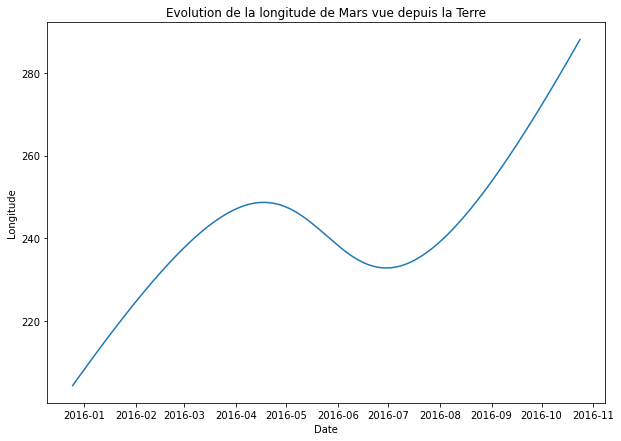

In [1]:
#importation des modules 
import numpy as np 
import math as mt
import pandas as pd 
import matplotlib.pyplot as plt 

df_coord = pd.read_csv("DataMars.csv", comment = '#', encoding = "utf-8") #lecture du fichier csv (qui devient un objet DataFrame)

longitude = df_coord["Longitude (decimal)"] #extraction de la collonne "longitude" (grace à son étiquette)
date = df_coord["Date"] #extraction de la collonne "Date"


#création d'un dictionnaire avec comme clés le nom des colonnes du csv et en valeur les données des colonnes
dic_global = {"Date" : date,
             "Longitude" : longitude}

#création d'un DataFrame à partir du dictionnaire
df_global = pd.DataFrame(data = dic_global)

df_selec = df_global.iloc[299:604]

date_selec = df_selec["Date"] #extraction 2 de la collonne "Date"
temps = pd.to_datetime(date_selec)



plt.figure(figsize=(10,7))
plt.title("Evolution de la longitude de Mars vue depuis la Terre")
plt.plot(temps,df_selec["Longitude"])
#plt.xlim(pd.to_datetime('2015-12'),pd.to_datetime('2016-12'))
#plt.ylim(150,300)
plt.xlabel("Date")
plt.ylabel("Longitude")
plt.show

df_selec

On observe ici clairement le phénomène, avec un "aller-retour" dans les valeurs de longitude, ce qui caractérise le rétrograde, qui survient ici entre mai et aout 2016

## Modèle Physique de la longitude de Mars par rapport au centre de la Terre 

La première étape est de configurer un intervale de temps pertinent pour notre model. Au fur et à mesure des essais, on se rend compte qu'on veut que l'instant où le Soleil, la Terre et Mars sont alignés survienne "au millieu" de notre intervalle pour pouvoir bien mettre en évidence le phénomène de rértograde.



In [2]:
#création du tableau de valeurs temporelles
# Paramètres de la discrétisation
temps_initial = -151 # jours
temps_final = 151 # jours
pas_temps = 1 # jours

# Création du tableau temps
intervalle = temps_final - temps_initial
num_points = int(intervalle / pas_temps) +1 # nombre d'éléments
temps_model = np.linspace(temps_initial, temps_final, num_points )

# Création de l'index contenant les dates de la discrétisation
#index_temps = pd.to_datetime(temps, unit = 'd', origin = '2020-01-14 13:45:00')

print(temps_model)

[-151. -150. -149. -148. -147. -146. -145. -144. -143. -142. -141. -140.
 -139. -138. -137. -136. -135. -134. -133. -132. -131. -130. -129. -128.
 -127. -126. -125. -124. -123. -122. -121. -120. -119. -118. -117. -116.
 -115. -114. -113. -112. -111. -110. -109. -108. -107. -106. -105. -104.
 -103. -102. -101. -100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.
  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.
  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.
  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.
  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.
  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.
  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.
  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.
   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.
    5.    6.    7.    8.    9.   10.   11.   12.   


A présent, on crée le modèle physique qui permettra de simuler l'évolution de la longitude de la position de Mars par rapport au centre de la Terre, et ce sur la plage temporelle qui nous interesse.

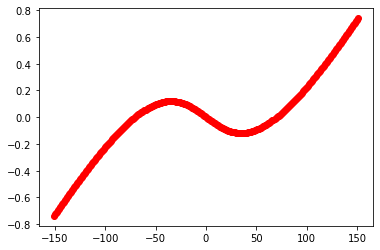

In [3]:
#modélisation de la position de la Terre en fonction du Temps
#constantes 
#Periodes
T_Terre = 365 #Jours
T_Mars = 668 #Jours 
#Vitesse angulaire 
ωT = (2*np.pi)/T_Terre
ωM = (2*np.pi)/T_Mars
#Terre 
rayon_orbitalT = 149597870.691 #km
#Mars 
rayon_orbitalM = 227942275.5719 #km

#Position Terre
X_T = rayon_orbitalT*np.cos(ωT*temps_model + 0)
Y_T = rayon_orbitalT*np.sin(ωT*temps_model + 0)

#Position Mars 
X_M = rayon_orbitalM*np.cos(ωM*temps_model + 0)
Y_M = rayon_orbitalM*np.sin(ωM*temps_model + 0)

#Distances Relatives
X_T_M = X_M - X_T
Y_T_M = Y_M - Y_T

#Angle Relatif 
angle = np.arctan2(Y_T_M, X_T_M)

plt.plot(temps_model, angle, 'o', color = 'r', linestyle = '-', linewidth=1)
plt.show()
